# 과제 1

## Matrix 구현
1. Linear Regression에서 쓰이는 **정규방정식**을 행렬로 구현하고, sklearn 혹은 OLS 패키지를 통해 구한 **실제 값과 비교**해주세요.
2. LSE에서 쓰이는 Loss Function, **MSE**를 행렬로 구현해 출력해주세요.

### Data Load

In [1]:
import pandas as pd
import os

data_dir = os.getcwd()
data = pd.read_csv(os.path.join(data_dir, "assignment1.csv"), encoding='utf8')

In [2]:
data.head()

,y,x1,x2,x3,x4,x5
0,10,38.9,64.7,4,868,59.7
1,13,41.6,45.3,-4,957,61.4
2,11,39.7,74.1,8,786,61.0
3,7,37.3,48.0,19,984,67.5
4,10,39.5,51.9,6,700,57.2


In [3]:
data.shape     # y:(9,1), X:(9,5)

(9, 6)

In [4]:
X = data.drop(["y"], axis=1)
y = data.y

In [5]:
# Matrix 계산을 위해 X와 y를 numpy 형태로 바꾸어줍니다.
X = X.to_numpy()
y = y.to_numpy()

In [6]:
X

array([[  38.9,   64.7,    4. ,  868. ,   59.7],
       [  41.6,   45.3,   -4. ,  957. ,   61.4],
       [  39.7,   74.1,    8. ,  786. ,   61. ],
       [  37.3,   48. ,   19. ,  984. ,   67.5],
       [  39.5,   51.9,    6. ,  700. ,   57.2],
       [  37.4,   53.6,   -5. , 1037. ,   58.8],
       [  35.1,   71.4,    3. ,  986. ,   58.6],
       [  38.8,   58.3,    6. ,  819. ,   59.2],
       [  36.6,   52.6,  -19. ,  791. ,   54.4]])

In [7]:
y

array([10, 13, 11,  7, 10,  9,  9,  6,  5], dtype=int64)

### 1. Normal Equation

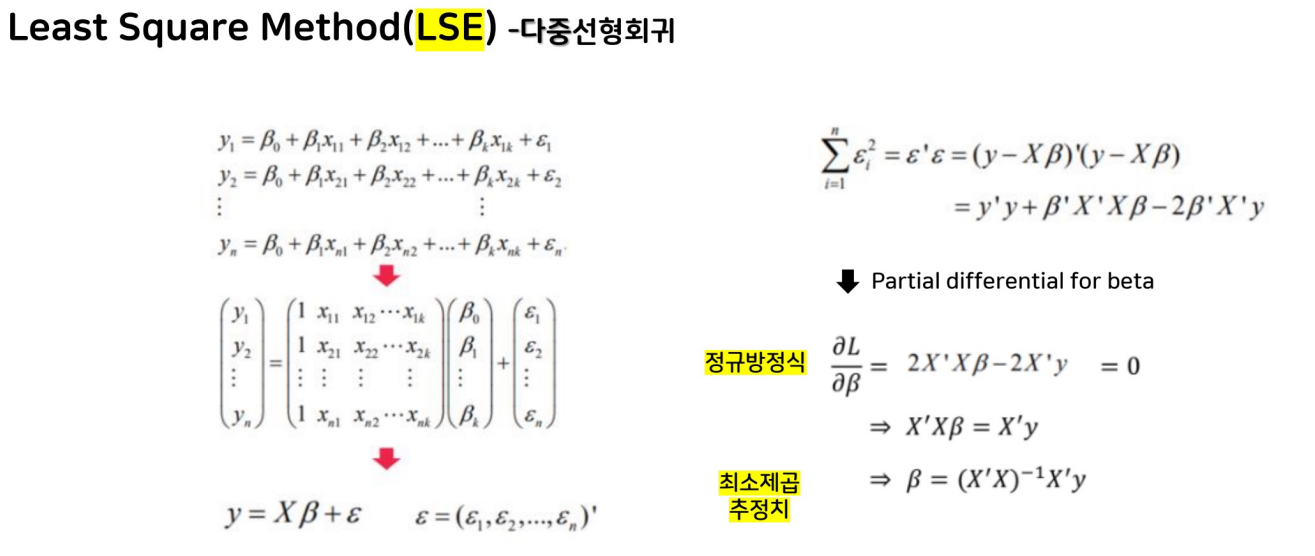

In [8]:
import numpy as np
from numpy.linalg import inv # 역행렬 구하는 함수

In [9]:
def estimate_beta(X, y):
    designX = np.hstack([np.ones((X.shape[0], 1)), X]) # 1로 이뤄진 열 추가
    beta_hat =np.matmul(np.matmul(inv(np.matmul(designX.T, designX)), designX.T), y)

    return beta_hat

In [10]:
beta_hat = estimate_beta(X, y)
beta_hat

array([-3.92447368e+01,  1.31232583e+00,  8.53744361e-02,  7.41849897e-02,
        1.50018573e-02, -3.42273652e-01])

#### 실제 값과 비교

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()
model.fit(X,y)

pred =model.predict(X)

In [13]:
print(model.intercept_)   # intercept
print(model.coef_)   # 추정된 회귀계수 (intercept 제외)

-39.24473678135655
[ 1.31232583  0.08537444  0.07418499  0.01500186 -0.34227365]


### 2. MSE

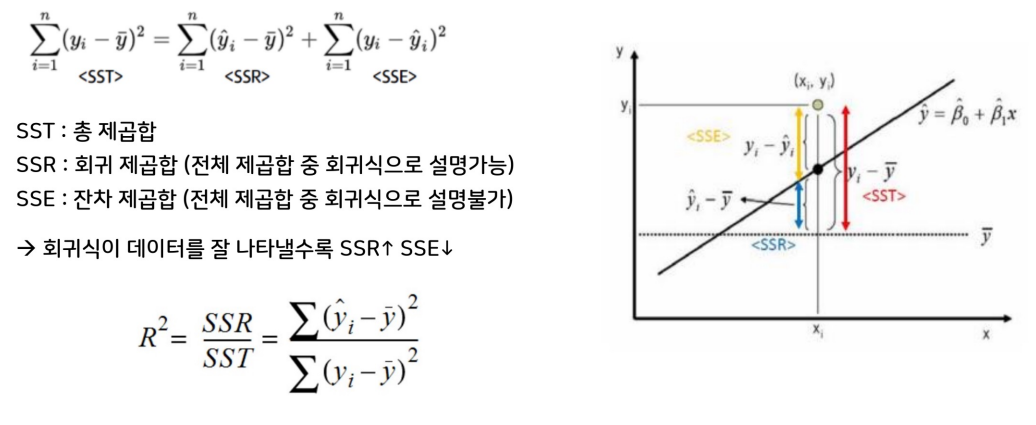

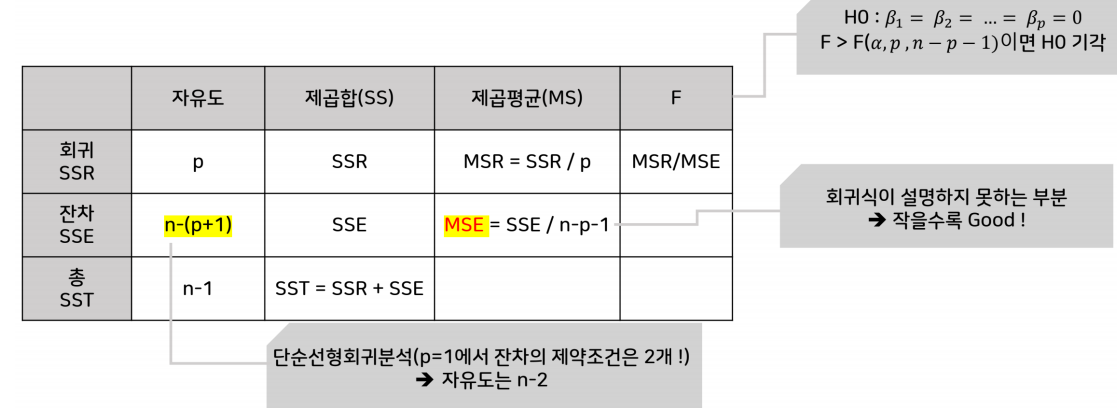


$  MSE=\frac{\sum_{i=1}^{n}(y_i-\hat{y_i})^2}{n-p-1} $

In [30]:
def MSE(X, y, beta_hat):
    # n : 데이터 개수 (X.shape[0])
    # p : 설명 변수 개수 (X.shape[1])
    designX =np.hstack([np.ones((X.shape[0], 1)), X]) # 1로 이뤄진 열 추가
    y_pred =np.dot(designX, beta_hat)
    mse =np.sum((y-y_pred)**2)/(X.shape[0]-X.shape[1]-1)

    return mse

In [31]:
MSE(X, y, estimate_beta(X, y))

4.846793168705758